![BTS](img/Logo-BTS.jpg)

# Session 11: Hypothesis testing

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-11-13)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/11-Hypothesis-testing.ipynb)

In [16]:
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [5]:
np.random.random?

In [7]:
vals_a = 10 + np.random.randn(10)
vals_b = 10 + np.random.randn(10)

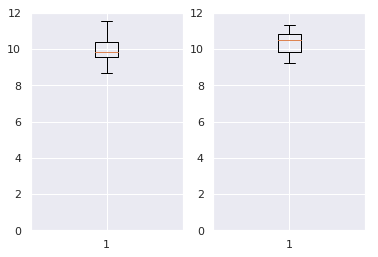

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.boxplot(vals_a)
ax1.set_ylim(0, 12)
ax2.boxplot(vals_b)
ax2.set_ylim(0, 12);

In [43]:
import seaborn

In [44]:
seaborn.__version__

'0.9.0'

## Exercise 1: Brain size and intelligence

* Gender: Male or Female
* FSIQ: Full Scale IQ scores based on the four Wechsler (1981) subtests
* VIQ: Verbal IQ scores based on the four Wechsler (1981) subtests
* PIQ: Performance IQ scores based on the four Wechsler (1981) subtests
* Weight: body weight in pounds
* Height: height in inches
* MRI_Count: total pixel Count from the 18 MRI scans

Brain size data from https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/correlation/Brain%20Size/brainsize.html

1. Read the brain size data in pandas, properly setting the missing values and dropping any meaningless columns
2. Plot box plots for FSIQ, VIQ and PIQ separating by gentder
3. Plot a scatter matrix of FSIQ, VIQ and PIQ like the figure below
4. Plot the box plots of FSIQ, VIQ and PIQ separated by gender

![Brain size](img/brain.png)

In [45]:
import pandas as pd

In [48]:
pd.read_csv??

In [69]:
#data = pd.read_csv("data/brain_size.csv", delimiter=";", index_col="Unnamed: 0")
##data = pd.read_csv("data/brain_size.csv", delimiter=";").drop("Unnamed: 0", axis='columns')
#data = pd.read_csv("data/brain_size.csv", delimiter=";").drop("Unnamed: 0", axis=1)
data = pd.read_csv("data/brain_size.csv", delimiter=";", na_values='.').drop(columns="Unnamed: 0")
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


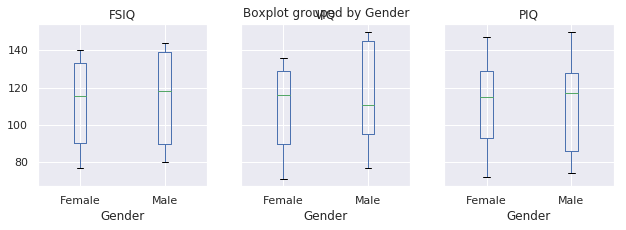

In [91]:
data.boxplot(["FSIQ", "VIQ", "PIQ"], by="Gender", figsize=(10, 3), layout=(1, 3));

In [100]:
import warnings
warnings.filterwarnings("ignore")

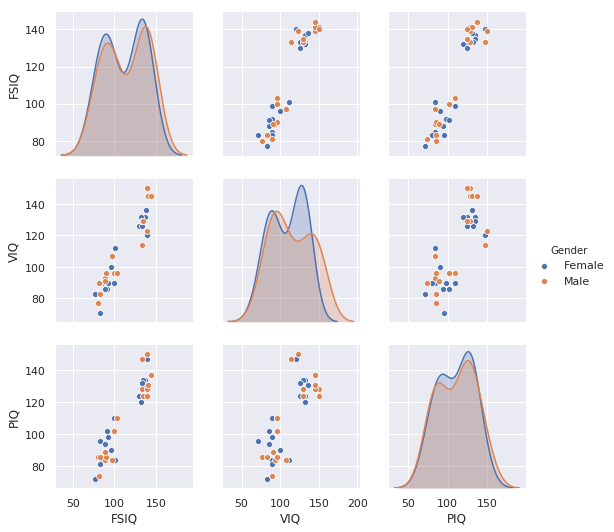

In [103]:
sns.pairplot(data, vars=["FSIQ", "VIQ", "PIQ"], hue="Gender", diag_kind="kde");

## Statistical tests

### One-sample t-test: testing the value of a population mean

> "If we take a sample of $n$ observations from a normal distribution, then the t-distribution with $\nu = n-1$ degrees of freedom can be defined as the distribution of the location of the sample mean relative to the true mean"
> https://en.wikipedia.org/wiki/Student%27s_t-distribution?oldformat=true

> "Although the parent population does not need to be normally distributed, the distribution of the population of sample means $\bar {x}$ is assumed to be normal"
> https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test

In [104]:
data["FSIQ"].mean()

113.45

In [105]:
from scipy import stats as st

In [106]:
st.ttest_1samp(data["FSIQ"], popmean=data["FSIQ"].mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [107]:
st.ttest_1samp(data["FSIQ"], popmean=110.0)

Ttest_1sampResult(statistic=0.9060564460313781, pvalue=0.3704699810976697)

In [108]:
st.ttest_1samp(data["FSIQ"], popmean=90.0)

Ttest_1sampResult(statistic=6.15855758244516, pvalue=3.118953534482729e-07)

### Two-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the male and female populations were different. Can we show it?

In [113]:
fsiq_male = data.loc[data["Gender"] == "Male", "FSIQ"]
fsiq_male.mean()

115.0

In [114]:
fsiq_fem = data.loc[data["Gender"] == "Female", "FSIQ"]
fsiq_fem.mean()

111.9

In [116]:
st.ttest_ind(115, 111.9)

Ttest_indResult(statistic=nan, pvalue=nan)

In [115]:
st.ttest_ind(fsiq_male, fsiq_fem)

Ttest_indResult(statistic=0.4026724743703011, pvalue=0.6894456253897778)

### Paired tests: repeated measurements on the same indivuals

PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

## Exercise 2: Central limit theorem and normality test

1. Create a uniform distribution of 100 values and plot its histogram
2. Create another uniform distribution of 10_000 values and plot its histogram again. What do you notice?
3. Create a function that receives two parameters: the size of the distribution `size` and the number of repetitions `num_reps`, and returns `uniform(size) + uniform(size) + ...`, `n_reps` times
4. Plot the histogram with increasing number of repetitions

In [2]:
import numpy as np

In [3]:
vals1 = np.random.uniform(size=100)

In [4]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

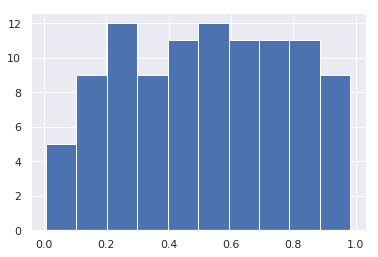

In [5]:
plt.hist(vals1);

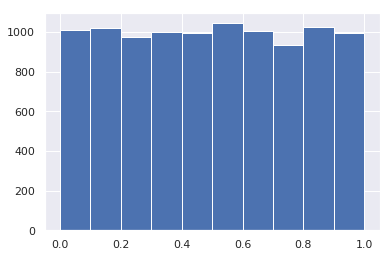

In [6]:
vals2 = np.random.uniform(size=10_000)
plt.hist(vals2);

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
def distribs_compact(size, num_reps):
    return np.random.uniform(size=(size, num_reps)).sum(axis=0)

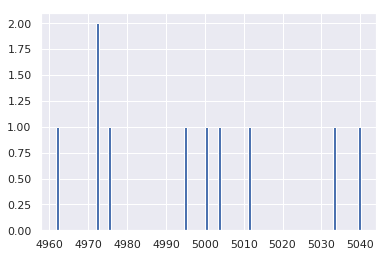

In [11]:
plt.hist(distribs_compact(10_000, 10), bins=100);

In [31]:
import numpy as np

In [32]:
def distribs(size, num_reps):
    result = np.zeros(size)
    for _ in range(num_reps):
        result = result + np.random.uniform(size=size)

    return result

In [38]:
uni_vals = distribs(4_000, 10_000)

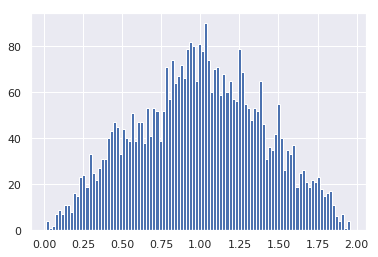

In [41]:
few_uni_vals = distribs(4_000, 2)
plt.hist(few_uni_vals, bins=100);

In [42]:
st.shapiro(few_uni_vals)

(0.9913660287857056, 7.150633505995964e-15)

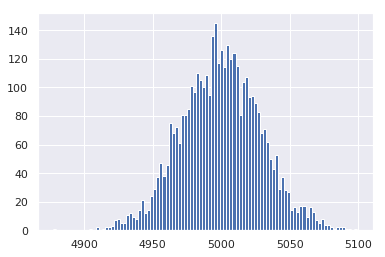

In [39]:
plt.hist(uni_vals, bins=100);

## Normality test

In [15]:
from scipy import stats as st

In [18]:
normal_rv = st.norm()

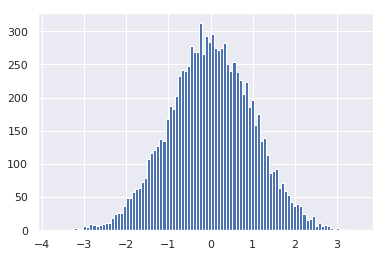

In [35]:
plt.hist(normal_rv.rvs(10_000), bins=100);

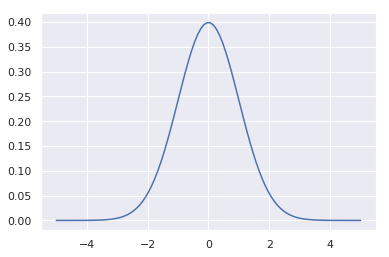

In [36]:
x = np.linspace(-5, 5, num=100)
plt.plot(x, normal_rv.pdf(x))

In [1]:
import scipy
scipy.__version__

'1.1.0'

In [2]:
from scipy import stats as st

In [3]:
normal_rv = st.norm()

In [29]:
vals = normal_rv.rvs(4_000)

_, p = st.shapiro(vals)
p

0.9117606282234192

In [40]:
_, p = st.shapiro(uni_vals)
p

0.35807615518569946

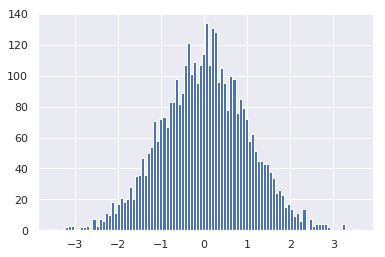

In [30]:
plt.hist(vals, bins=100);

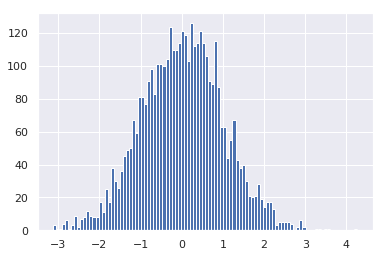

In [27]:
plt.hist(vals, bins=100);

In [25]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [27]:
uniform_rv = st.uniform()

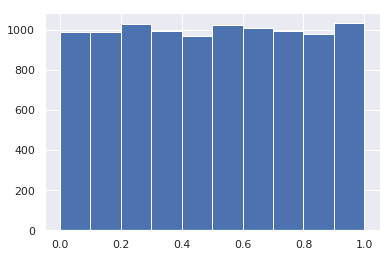

In [29]:
plt.hist(uniform_rv.rvs(10_000));